# Notebook
A notebook is composed of cells, each cell can be a markdown "a note" or a code cell. To run a cell you need to hit SHIFT+ENTER

In [1]:
# Run me please! (hint: press SHIFT+ENTER)
! python -m pip install pandas==1.3.4 numpy==1.21.4 matplotlib==3.4.3 seaborn==0.11.2 scikit-learn==1.0.1 lightgbm==3.3.1

# "Hello TotalEnergies" in Python

Some basics programming concepts to grasp some programming basics

A variable hold a value, in python, it can hold any type of value such as: Integer, Float, Text, Vector,  DataFrame..

In [7]:
my_integer = 2 # 'a' hold the integer 1
my_company = "TotalEnergies" # my_company variable holds the text TotalEnergies
my_vector = [1,2,3,4] # my_vector holds a vector

From here it is just Math !

In [8]:
my_integer + 2 # add two the variable my_integer

4

The print command help us print what is stored inside the variable

In [9]:
print(my_company)

TotalEnergies


# Import packages
A package (or library) contains several functions useful in a particular context. Here we import some packages that are generally used in science projects:

- pandas: to manipulate datasets
- numpy: to apply mathematical functions
- matplotlib: to display graphs
- sklearn: contains a lot of machine learning functions and models

In [2]:
# import packages
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# import model
from sklearn.linear_model import LinearRegression

# Set some jupyter display options
from IPython.display import Image
pd.options.display.max_columns = None

## For this exercise, we provide data.csv file, which is just an excel file containing the following columns 
- instant: record index 
- dteday : date 
- season : season (1:winter, 2:spring, 3:summer, 4:fall) 
- yr : year (0: 2011, 1:2012) 
- mnth : month ( 1 to 12) 
- hr : hour (0 to 23) 
- holiday : weather day is holiday or not (extracted from [Web Link]) 
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 
- hum: Normalized humidity. The values are divided to 100 (max) 
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- cnt: count of total rental bikes including both casual and registered 

# Import data
In this part, we use the pandas library in order to import the data into our notebook. The data is then saved into a dataframe called *dataset_bike*

In [3]:
# load data into a dataframe
dataset_bike = pd.read_csv("data.csv",
                           sep = ',',
                           header=0,
                           skip_blank_lines=True,
                           index_col=0)

In [4]:
# print the shape of this dataframe: (nb of rows, nb of columns)
print("The shape of the dataframe is :", dataset_bike.shape)

The shape of the dataframe is : (12166, 15)


In [5]:
# show the first rows of the dataframe
dataset_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


The goal of this project is to be able to accuratly predict the number of bike that are rented at a given hour. It is the variable **cnt**. To do that, we have access to 2 years of records, including several features such as:
- meteorological measures (temp, atemp, hum, weathersit, windspeed)
- datetime information (hr, holiday, weekday, yr, mth..)

**GOAL raised by your client**: Your model must be able to predict the hourly demand on random samples with a MAE **smaller than 30 bikes**...

MAE: Mean Absolute Error

$$MAE=\frac{1}{n}\sum_{i=0}^n|pred_i- target_i|$$

With:
- $n$: number of samples
- $pred_i$: predicted demand for sample i
- $target_i$: real demand for sample i


# Preprocessing
In this part, you will prepare your dataframe so it can be ingested by a machine learning model. The main idea is:
- to get rid or replace missing values (you are lucky there is no missing values in this dataset): this is called **missing values imputation**
- to keep only numerical variables. Categorical variables have to be encoded: this called **dummification**
- if possible try to create new variables from the ones that already exist. These new variables can improve predictions if they bring *signal*: this is called **feature engineering**
- to split your dataframe in 2 parts. A first one will be used for **training** your model, the other one will be for **testing the performance** of this model

Now, you are still in the first step of your project. So, let's keep it as simple as possible! You will only do dummification for the moment

## Dummification

The dummification is a function that transpose a column to a set of columns in a dataframe, such as:

| Column |
|------|
|   a  |
|   b  |
|   b  |
|   c  |
|   a  |

becomes 

| is_a | is_b | is_c |
|------|------|------|
|   1  |   0  |   0  |
|   0  |   1  |   0  |
|   0  |   1  |   0  |
|   0  |   0  |   1  |
|   1  |   0  |   0  |

All the non (truly) numerical variables have to be dummified in order to keep only numerical values in our dataset. We can also apply dummification to numerical variables if there is not a relational ranking among the values. Here we will apply this function to *weathersit* and *season*

In [ ]:
# define a list that contain all the columns to dummify
columns_to_dummify = ["weathersit", "season"]

# create a copy of dataset_bike. This allows to keep it in memory and work on a new dataframe!
dataset_bike_dummified = dataset_bike.copy()

# Now let's apply dummification
for col in columns_to_dummify:
    dataset_bike_dummified = pd.concat([dataset_bike_dummified, pd.get_dummies(dataset_bike[col], prefix=col)], axis=1)
    dataset_bike_dummified = dataset_bike_dummified.drop(col, axis=1)

In [ ]:
# print the first values of our new dataframe
dataset_bike_dummified.head()

## Split Train and Test
Now, you have to choose which features will be taken as input in your model, and which one is the **target**.
Then, let's split your dataframe into train and test. Usually, we use the letter **X** to talk about the features, and **y** for the target

![](../images/overfitting.png)

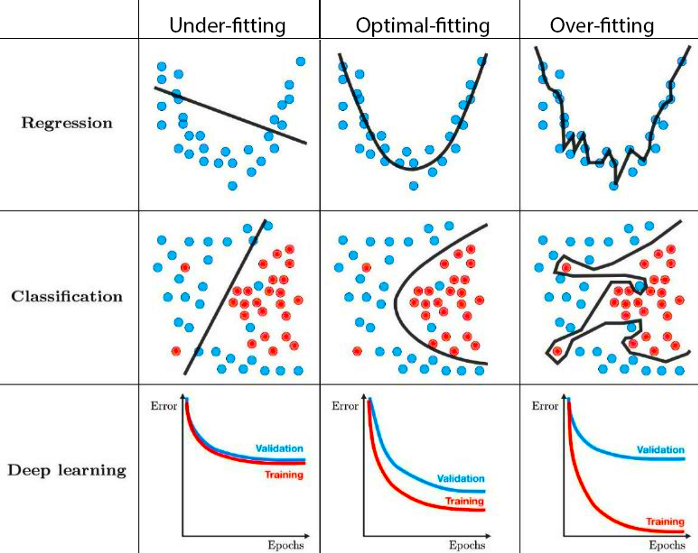

In [3]:
Image(filename='../images/overfitting.png')

In [ ]:
# let's define a variable that contains the list of features to keep for the model
features_training = ["yr", "mnth", "hr", "holiday", "weekday", "workingday", "temp", "atemp", "hum", "windspeed",
                    "weathersit_1", "weathersit_2", "weathersit_3", "weathersit_4", "season_1", "season_2",
                     "season_3", "season_4"]

# Now define which is your target
target_feature = "###CODE HERE###"

In [ ]:
# split your dataframe randomly in order to keep 80% of the samples for training, 20% for testing (also called evaluation).
X_train, X_test, y_train, y_test = train_test_split(dataset_bike_dummified[features_training],
                                                    dataset_bike_dummified[target_feature],
                                                    test_size=0.2, random_state= 1234)

# print the shapes
print("Shape X_train :", X_train.shape)
print("Shape X_test :", "###CODE HERE###".shape)
print("Shape y_train :", y_train.shape)
print("Shape y_test :", "###CODE HERE###".shape)

# Training
Now, your dataframe is ready! You have to choose a model and train it on your data.
Let's take only one type of model for the moment, a simple one: the linear regression.

Training your model is pretty simple thanks to the scikit-learn package! Let's see how it works!

### Model: Mutivariate Linear Regression

In [ ]:
# create an "empty" model
lreg = LinearRegression(fit_intercept = False)

# fit (=train) this model. => this is when the model is looking for the best surface in 
# a vectorial space that minimise the distance between samples.
lreg.fit(X_train ,y_train)

# Evaluation

Great! The model is trained. Now it is time to run an evaluation to see if your model meets the expectations of your client (MAE < 30 bikes)

In [ ]:
# Compute predictions on Train
lreg_pred_train = lreg.predict(X_train)
# Compute predictions on Test: this will be used for evaluation
lreg_pred_test = lreg.predict("###CODE HERE###")

# Evaluate
print("MAE Training = ", mean_absolute_error(lreg_pred_train, y_train))
print("***** MAE Test = ", mean_absolute_error(lreg_pred_test, y_test), " ******")

**Unfortunatly, it seems that "MAE Test" is not small enough to satisfy your client :/.** In the next Notebooks, we will see several methods in order to help you improve your score!